Proyecto Final
==============

### Tratamiento de Datos
### Máster de Ing. de Telecomunicación

# Autores

Juan Manuel Espinosa Moral ([100406523@alumnos.uc3m.es](mailto:100406523@alumnos.uc3m.es))

José Manuel García Núñez ([100544621@alumnos.uc3m.es](mailto:100544621@alumnos.uc3m.es))

In [2]:
# Integración en Collab

# Librerías de drive
from google.colab import drive
import os, sys

# Montaje
drive.mount("/content/drive")

# Directorio actual
print(os.getcwd())

# Cambio de directorio al compartido
directory_path = "/content/drive/MyDrive/Colab Notebooks/proyecto_td/"  # path
# If para crear el directorio en su path en caso de no existir
if not os.path.exists(directory_path):
  os.makedirs(directory_path)
  print(f"Directory created: {directory_path}")

os.chdir(directory_path) # switch de directorio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


# 1. Análisis de Variables de Entrada
Carga del dataset: datos del archivo JSON.
Categorías: las más frecuentes.
Rating y visualizaciones.
Análisis de correlación: categorias y variables de salida.

Categorías más frecuentes:
 categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
Name: count, dtype: int64


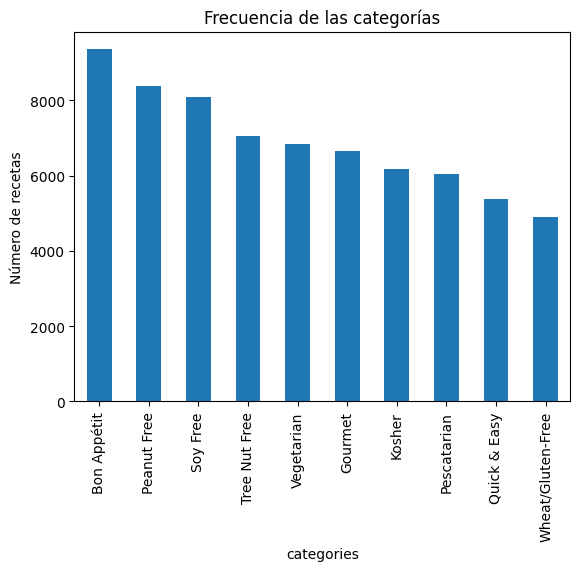

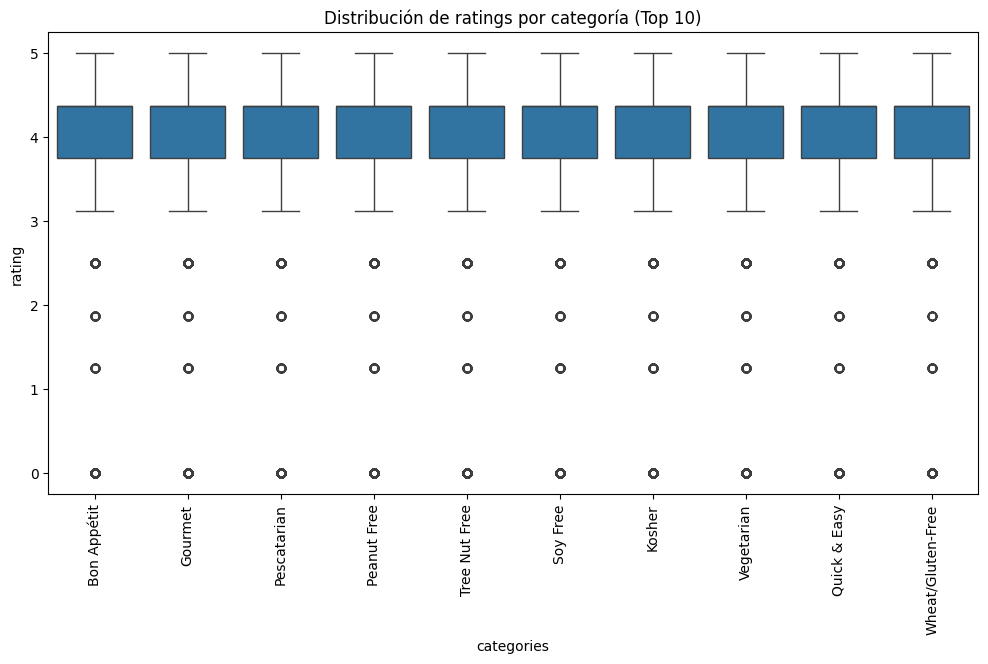

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el JSON
df = pd.read_json("full_format_recipes.json")

# Explorar categories en cuanto a aparición
category_counts = df['categories'].explode().value_counts()
print("Categorías más frecuentes:\n", category_counts.head())

# Top 10 categories
category_counts.head(10).plot(kind='bar', title="Frecuencia de las categorías")
plt.ylabel("Número de recetas")
plt.show()

# Analizar la relación entre categorías y ratings, filtrando por las más frecuentes
df_exploded = df.explode('categories')  # Expandir listas de categorías
df_exploded = df_exploded.reset_index(drop=True)  # Resetear el índice

# Filtrar por las 10 categorías con mejor rating
top_categories = category_counts.head(10).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría (Top 10)")
plt.show()

               fat   protein  calories    sodium    rating
fat       1.000000  0.712194  0.996538  0.986476  0.007235
protein   0.712194  1.000000  0.742816  0.749287  0.013972
calories  0.996538  0.742816  1.000000  0.996392  0.007882
sodium    0.986476  0.749287  0.996392  1.000000  0.008179
rating    0.007235  0.013972  0.007882  0.008179  1.000000


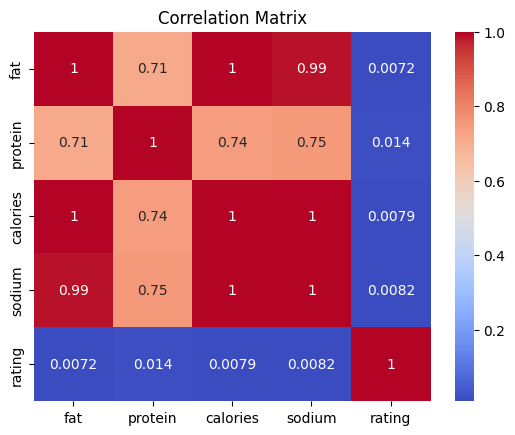

In [ ]:
# correlacion y heatmap de variables
correlation = df[['fat', 'protein', 'calories', 'sodium', 'rating']].corr()

print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

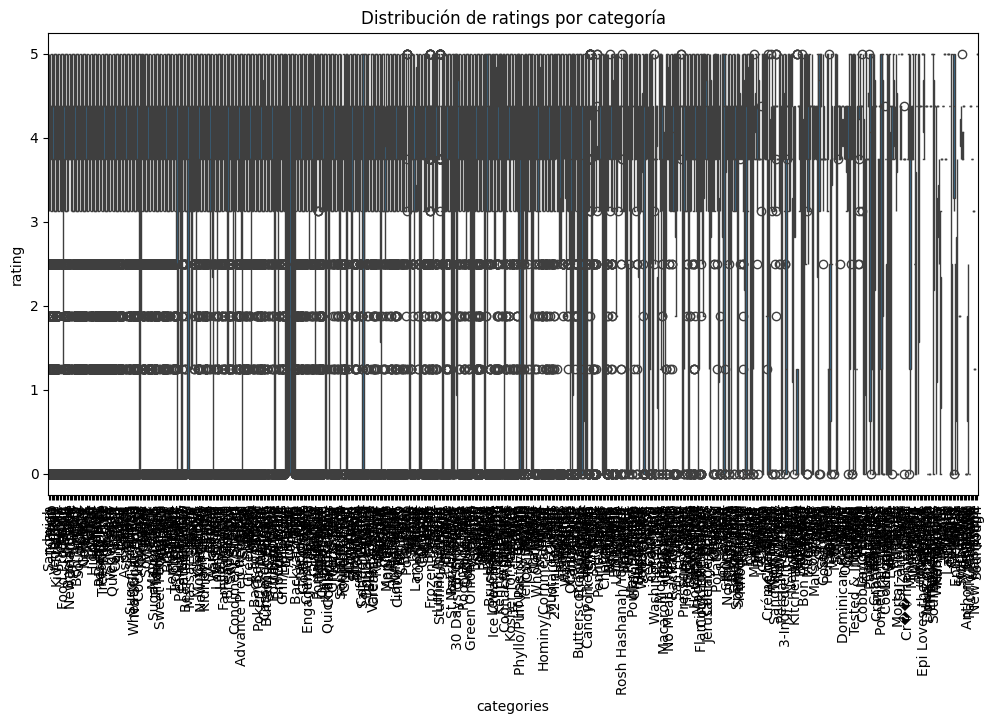

In [ ]:


# Relación de ratings por categories
df_exploded = df.explode('categories')  # Expandir listas de categorías
df_exploded = df_exploded.reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_exploded)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría")
plt.show()


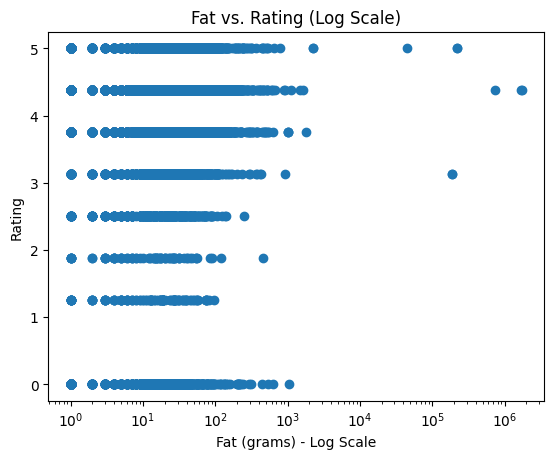

In [ ]:
# import matplotlib.pyplot as plt

# Analisis logarítmico relacionando fat y rating
plt.scatter(df['fat'], df['rating'])
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.xlabel('Fat (grams) - Log Scale')
plt.ylabel('Rating')
plt.title('Fat vs. Rating (Log Scale)')
plt.show()

<ipython-input-7-211975479a60>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby('calorie_bins')['rating'].mean()


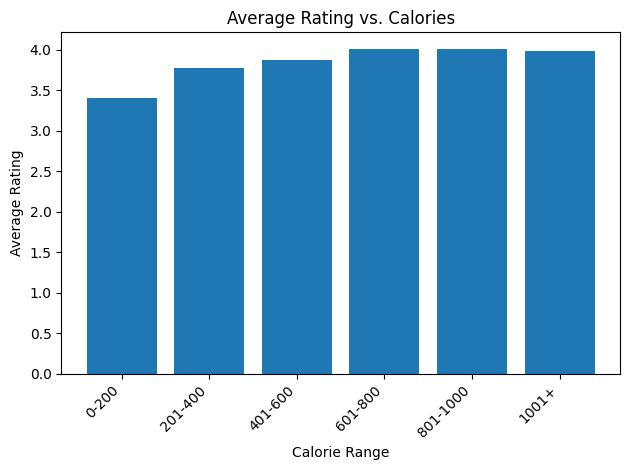

In [ ]:
# Relación entre rating y calories

# se definen los tramos de calorias
bins = [0, 200, 400, 600, 800, 1000, float('inf')]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001+']

# creación de una columna independiente con calorías
df['calorie_bins'] = pd.cut(df['calories'], bins=bins, labels=labels)

# creación de una medía de calorias en baase al rating
average_ratings = df.groupby('calorie_bins')['rating'].mean()

# graficación de resultados
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Calorie Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Calories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-8-45b7ed4c0721>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby('fat_bins')['rating'].mean()


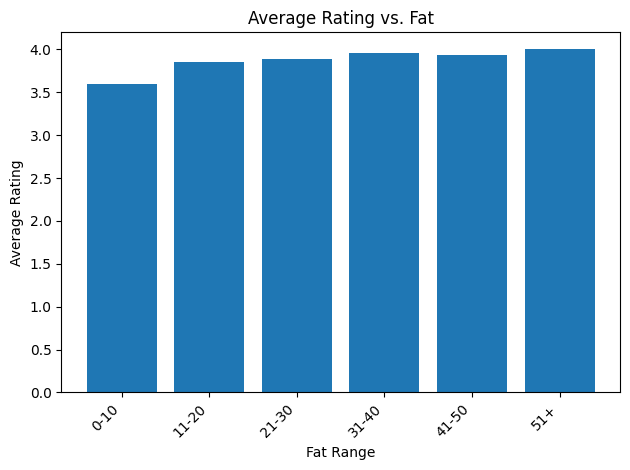

In [ ]:
# se definen los tramos de grasa (gramos)
bins_fat = [0, 10, 20, 30, 40, 50, float('inf')]
labels_fat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

# creación de una columna independiente con grasas
df['fat_bins'] = pd.cut(df['fat'], bins=bins_fat, labels=labels_fat)

# creación de una media de calorias en base a la cantidad de grasas
average_ratings = df.groupby('fat_bins')['rating'].mean()

# graficación de resultados
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Fat Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Fat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-9-cc9b3100a35e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby('protein_bins')['rating'].mean()


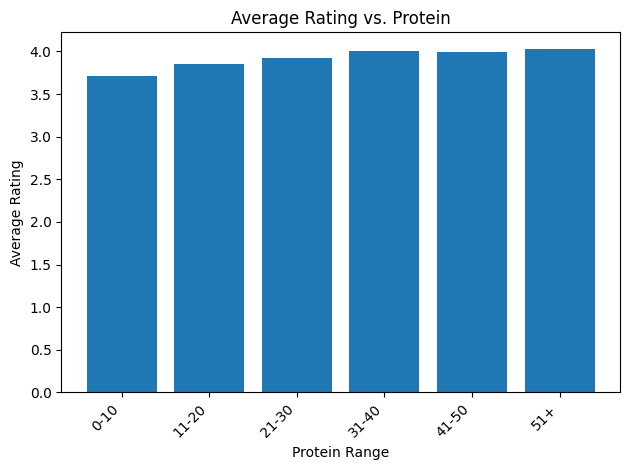

In [ ]:
# se definen los tramos de proteina (gramos)
bins_protein = [0, 10, 20, 30, 40, 50, float('inf')]
labels_protein = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

# creación de una columna independiente con proteina
df['protein_bins'] = pd.cut(df['protein'], bins=bins_protein, labels=labels_protein)

# creación de una media de calorias en base a la cantidad de proteina
average_ratings = df.groupby('protein_bins')['rating'].mean()

# graficación de resultados
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Protein Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Protein')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

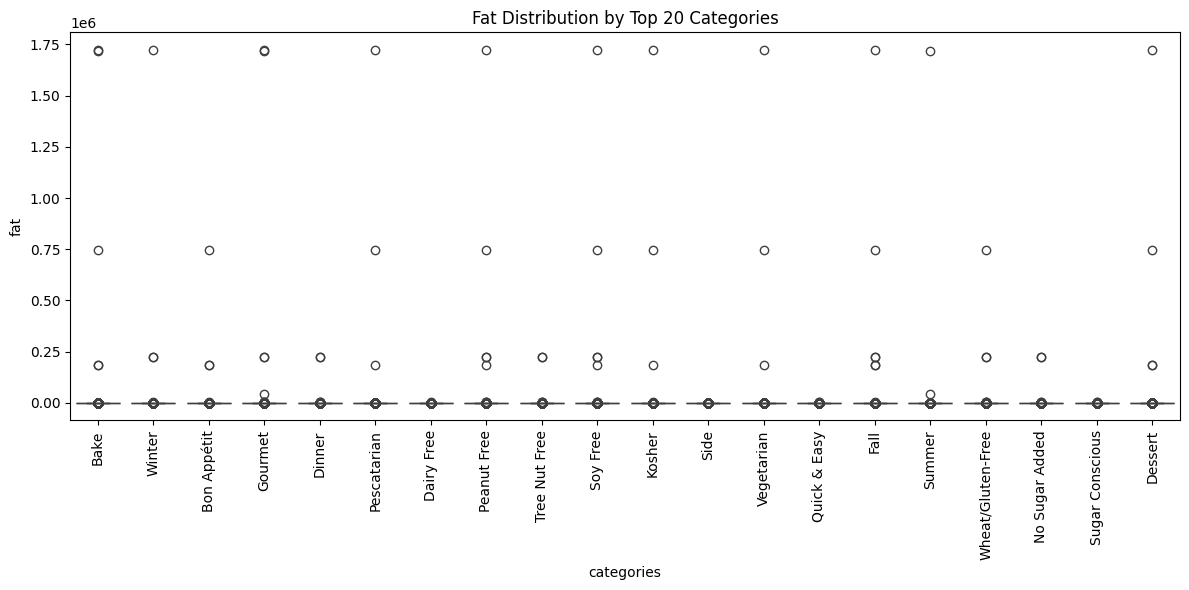

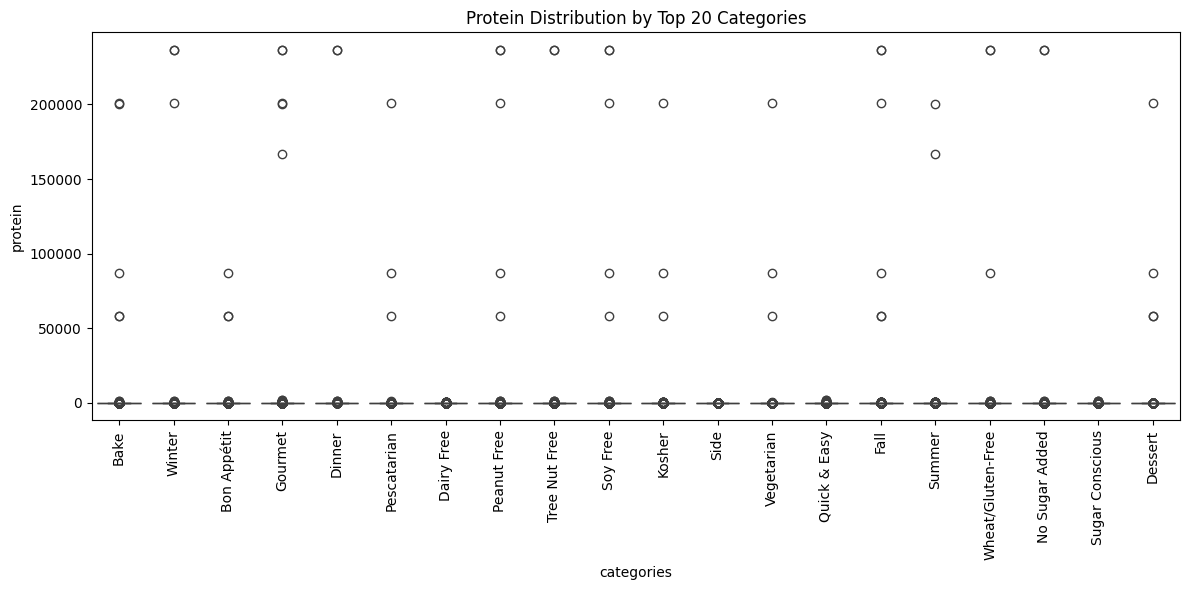

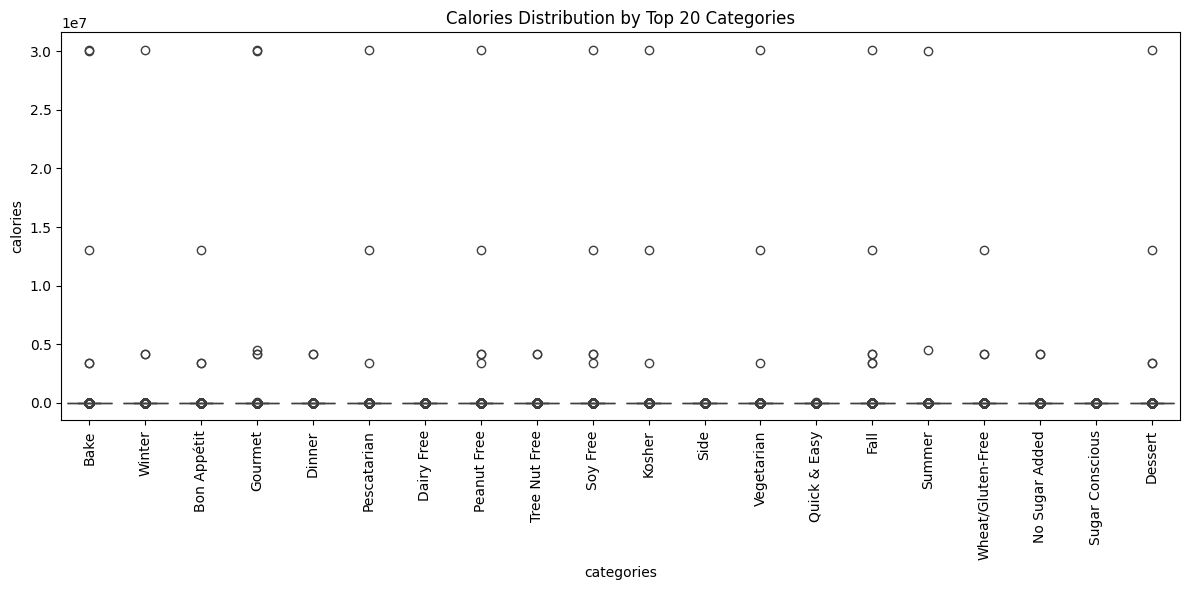

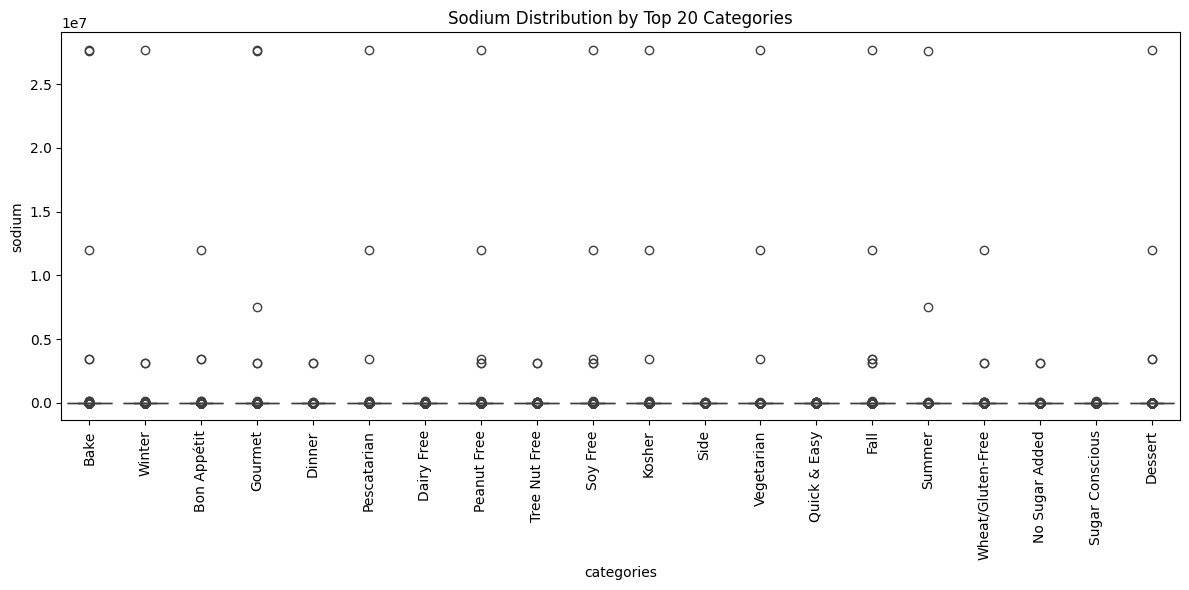

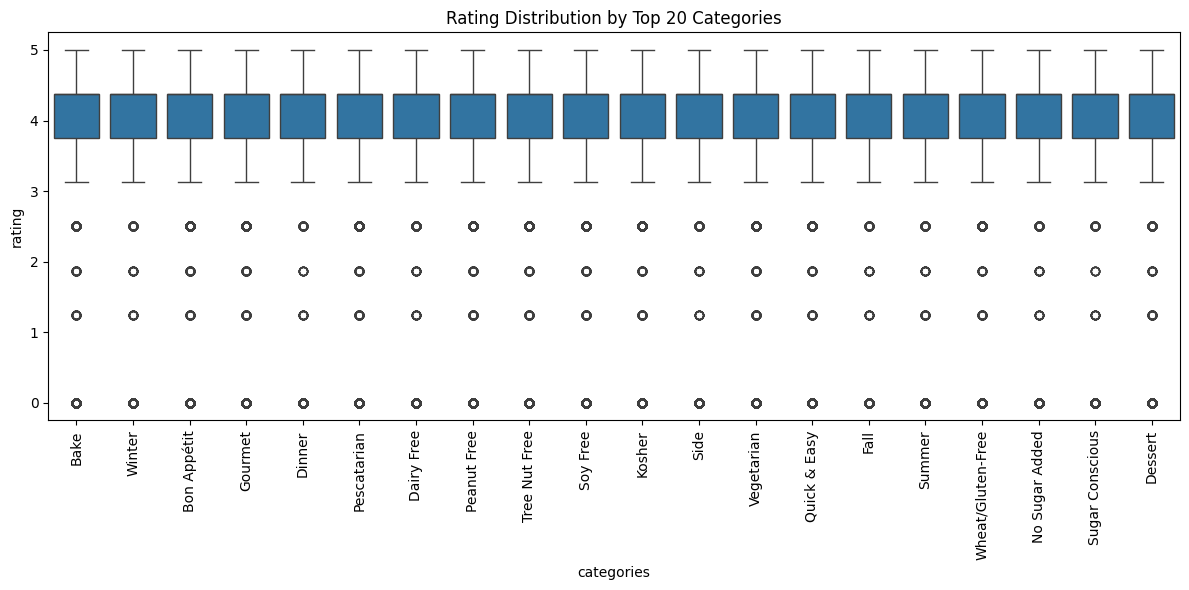

In [ ]:
# Esta parte no se si tiene mucho sentido mantener

top_20_categories = df_exploded['categories'].value_counts().head(20).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_20_categories)]

variables = ['fat', 'protein', 'calories', 'sodium', 'rating']
for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='categories', y=variable, data=df_filtered)
    plt.xticks(rotation=90)
    plt.title(f'{variable.capitalize()} Distribution by Top 20 Categories')
    plt.tight_layout()
    plt.show()

Pipeline

In [4]:
import re
import spacy

# cargado de spaCy
nlp = spacy.load("en_core_web_sm")

# Contar instancias antes de la eliminación
print(f"Número de instancias antes de la eliminación: {len(df)}")

# Eliminar instancias con 'desc' vacío o nulo
df = df.dropna(subset=['desc'])  # Eliminar filas con valores NaN en 'desc'
df = df[df['desc'] != '']  # Eliminar filas con cadenas vacías en 'desc'

# Contar instancias después de la eliminación
print(f"Número de instancias después de la eliminación: {len(df)}")


# definición del método de procesado de texto del pipeline
def preprocess_text(text, use_spacy=False):

    # Si el texto es NaN o no es string/list, convertirlo a cadena vacía
    if not isinstance(text, (str, list)):
        text = ''

    # si el texto es una lista, unir sus elementos en una sola cadena
    if isinstance(text, list):
        text = ' '.join(text)

    # pasar a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-z\s]', '', text)

    if use_spacy:
        # Usar SpaCy para tokenización y lematización
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if not token.is_stop]
    else:
        # Tokenizar el texto
        tokens = nltk.word_tokenize(text)

        # Eliminar stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lematizar
        lemmatizer = nltk.WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir tokens de nuevo en un solo string
    processed_text = ' '.join(tokens)
    return processed_text

# Manejar valores NaN en la columna 'categories'
df['categories'] = df['categories'].fillna('')

# Aplicar el pipeline al conjunto de datos
df['processed_categories'] = df['categories'].apply(preprocess_text, use_spacy=True)

# print de resultados
print(df[['categories', 'processed_categories']].head())

# Repetir el proceso con desc
df['desc'] = df['desc'].fillna('')
df['processed_desc'] = df['desc'].apply(preprocess_text, use_spacy=True)
print(df[['desc', 'processed_desc']].head())



Número de instancias antes de la eliminación: 20130
Número de instancias después de la eliminación: 13495
                                          categories  \
1  [Food Processor, Onion, Pork, Bake, Bastille D...   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...   
5  [Sandwich, Food Processor, Tomato, Kid-Friendl...   
6  [Salad, Potato, Side, Easter, Low Fat, Quick &...   
7  [Egg, Fruit, No-Cook, Cocktail Party, Vegetari...   

                                processed_categories  
1  food processor onion pork bake bastille day ne...  
3  fish olive tomato saut low fat low cal high fi...  
5  sandwich food processor tomato kidfriendly qui...  
6  salad potato easter low fat quick   easy ham a...  
7  egg fruit nocook cocktail party vegetarian win...  
                                                desc  \
1  This uses the same ingredients found in boudin...   
3  The Sicilian-style tomato sauce has tons of Me...   
5  This recipe can be prepared in 45 minutes or l...   
6  

Vectorización TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creación del objeto a vectorizar
vectorizer = TfidfVectorizer()

# conversión de datos para vectorizar
tfidf_matrix1 = vectorizer.fit_transform(df['processed_categories'])
# extracción de los nombres
feature_names1 = vectorizer.get_feature_names_out()
# creación del dataframe con los datos convertidos a arrays pasados por el método y los nombres extraidos
tfidf_df1 = pd.DataFrame(tfidf_matrix1.toarray(), columns=feature_names1, index=df.index)

# ------------------------------------------------------------------------------
# Repetición del proceso anterior para desc en lugar de categories
vectorizer2 = TfidfVectorizer()  # Or use: vectorizer = TfidfVectorizer() if reusing
tfidf_matrix2 = vectorizer2.fit_transform(df['processed_desc'])  # Or use: vectorizer.fit_transform if reusing
feature_names2 = vectorizer2.get_feature_names_out()  # Or use: vectorizer.get_feature_names_out() if reusing
tfidf_df2 = pd.DataFrame(tfidf_matrix2.toarray(), columns=feature_names2, index=df.index)

# print de los resultados
print("TF-IDF DataFrame for 'processed_categories':")
print(tfidf_df1)

print("\nTF-IDF DataFrame for 'processed_desc':")
print(tfidf_df2)

TF-IDF DataFrame for 'processed_categories':
            add  advance  alabama  alcoholic  almond  amaretto  anchovy  \
1      0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
3      0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
5      0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
6      0.135266      0.0      0.0        0.0     0.0       0.0      0.0   
7      0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
...         ...      ...      ...        ...     ...       ...      ...   
20121  0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
20123  0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
20126  0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
20128  0.000000      0.0      0.0        0.0     0.0       0.0      0.0   
20129  0.000000      0.0      0.0        0.0     0.0       0.0      0.0   

       angeles  anise  anniversary  ...    winter  wis

Vectorización Word2sec

In [6]:
!pip install nltk==3.8.1
!pip install gensim

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import numpy as np
from gensim.models import Word2Vec


# Preparado de datos de texto
sentences = [row.split() for row in df['processed_categories']]

# Entrenamiento del modelo con las condiciones normales

model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# 3. Obtén los vectores de palabras y promediados

def get_category_vector(category_words):
  """Obtiene el vector promedio para una categoría."""
  vectors = [model.wv[word] for word in category_words if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)  # Vector de ceros si no hay palabras en el vocabulario

df['category_vector'] = df['processed_categories'].apply(lambda x: get_category_vector(x.split()))

# Muestra los primeros 5 elementos del vector para las primeras 5 filas
for index in df.index[:5]:  # Iterate using actual index labels
    print(f"Fila {index}: {df['category_vector'][index][:5]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fila 1: [-0.36366075  0.01224316 -0.18684284  0.21098833  0.01760352]
Fila 3: [ 0.3658074   0.38742623  0.3226763   0.31935674 -0.52480394]
Fila 5: [ 0.10443     0.13622189 -0.10178939  0.08475292  0.16818315]
Fila 6: [ 0.2149918   0.32410985  0.30171803  0.2965495  -0.59918827]
Fila 7: [-0.2098534   0.15972655 -0.08853804 -0.13808867  0.08006357]


In [ ]:
!pip install nltk==3.8.1
!pip install gensim

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import numpy as np
from gensim.models import Word2Vec

# 1. Preparar datos de texto para 'categories'
sentences1 = [row.split() for row in df['processed_categories']]

# 2. Entrenar el modelo para 'categories'
model1 = Word2Vec(sentences1, vector_size=100, window=5, min_count=5, workers=4)

# 3. Obtener vectores promediados para 'categories'
def get_vector(text_words, model):
  """Obtiene el vector promedio para un texto."""
  vectors = [model.wv[word] for word in text_words if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)  # Vector de ceros si no hay palabras en el vocabulario

df['category_vector'] = df['processed_categories'].apply(lambda x: get_vector(x.split(), model1))

# Muestra de 5 resultados
print("Resultados para 'categories':")
for index in range(5):
  print(f"Fila {index}: {df['category_vector'][index][:5]}")

# ------------------------------------------------------------------------------
# Repetir el proceso para desc
sentences2 = [row.split() for row in df['processed_desc']]
model2 = Word2Vec(sentences2, vector_size=100, window=5, min_count=5, workers=4)
df['desc_vector'] = df['processed_desc'].apply(lambda x: get_vector(x.split(), model2))


print("\nResultados para 'desc':")
for index in range(5):
  print(f"Fila {index}: {df['desc_vector'][index][:5]}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Resultados para 'categories':
Fila 0: [-0.687035    0.09914834 -0.31216314 -0.15794113 -0.12226275]
Fila 1: [-0.35841945  0.08673175  0.01241906  0.32807088  0.22714105]
Fila 2: [-0.77601624 -0.23346928  0.1588996   0.09209627 -0.29791966]
Fila 3: [ 0.05452462  0.32197315  0.17018922  0.10957456 -0.22552457]
Fila 4: [-0.36072564  0.11268283  0.21367776  0.07786022  0.23985483]

Resultados para 'desc':
Fila 0: [0. 0. 0. 0. 0.]
Fila 1: [-0.40166682  0.40299204  0.07753629 -0.00455588  0.16226168]
Fila 2: [0. 0. 0. 0. 0.]
Fila 3: [ 0.11848862  0.26152235  0.14631373 -0.12562089 -0.15425654]
Fila 4: [0. 0. 0. 0. 0.]


Testing de los metodos de vectorización TF-IDF y vec2sec

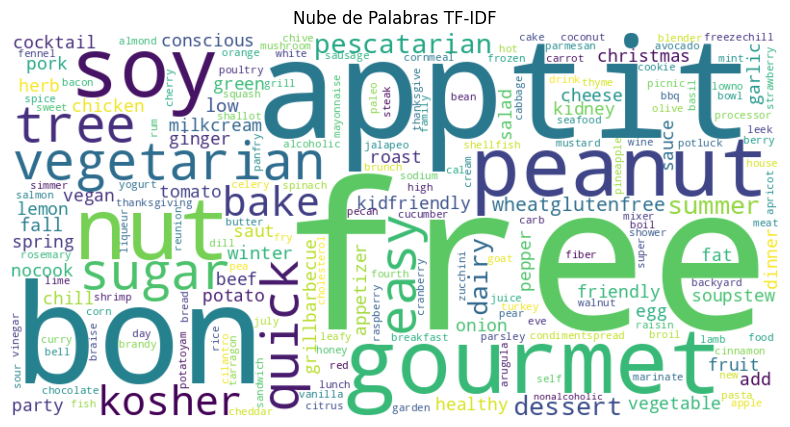

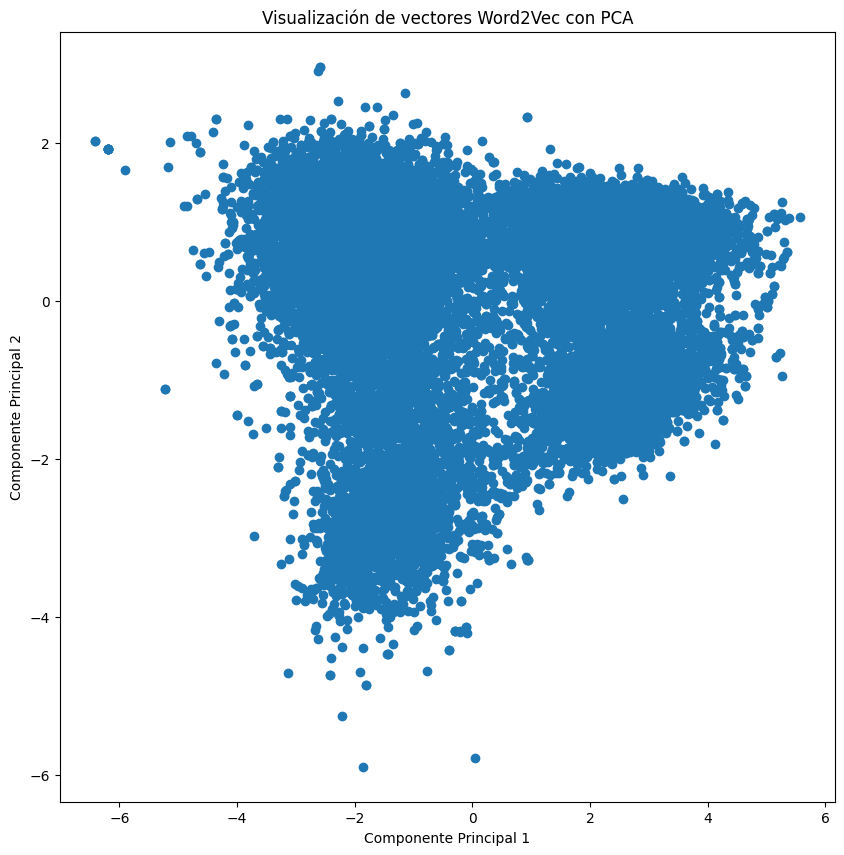

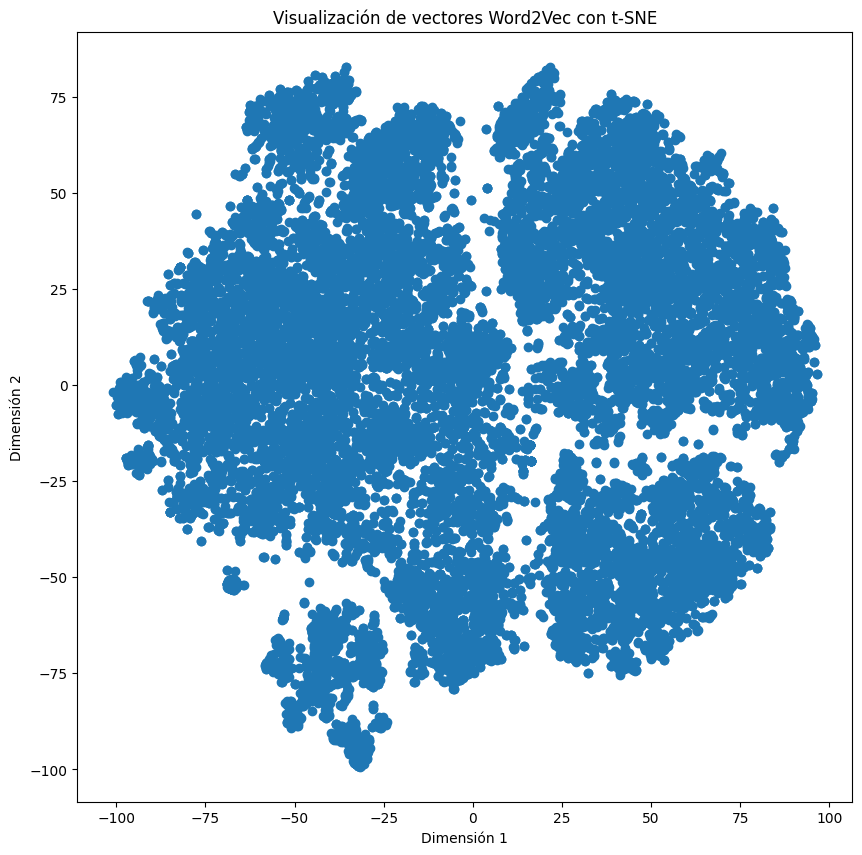

In [ ]:
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA # Import PCA
import numpy as np # Import numpy

# Visualización de TF-IDF con Nube de Palabras
word_weights = dict(zip(feature_names1, tfidf_matrix1.sum(axis=0).tolist()[0]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras TF-IDF")
plt.show()

# Visualización de Word2Vec con PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(df['category_vector'].to_list())
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title("Visualización de vectores Word2Vec con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Visualización de Word2Vec con t-SNE

tsne = TSNE(n_components=2, random_state=42)
# Convert the list of vectors to a 2D NumPy array
category_vectors = df['category_vector'].to_list()
vectors_2d = tsne.fit_transform(np.array(category_vectors).reshape(len(category_vectors), -1)) # Reshape if necessary
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title("Visualización de vectores Word2Vec con t-SNE")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.show()

Vectorización de Embeddings contextuales - BERT -

In [ ]:
# Importar librerías necesarias
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np

# Reducir el tamaño del dataset para pruebas
df_sampled = df.sample(frac=0.1, random_state=42)

# Cargar el modelo y el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Configurar el modelo en modo entrenamiento
model.train()

# Configurar un optimizador (necesario para calcular gradientes)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

def generate_bert_embeddings_with_gradients(text):
    # Tokenizar el texto
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Propagación hacia adelante
    outputs = model(**inputs)

    # Extraer embeddings [CLS] (primera posición)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]

    # Habilitar retención de gradientes para el tensor
    cls_embeddings.retain_grad()

    # Ejemplo: calcular una "pérdida ficticia" para gradientes
    loss = cls_embeddings.norm()  # Norma L2 de los embeddings
    loss.backward()  # Propagación hacia atrás para calcular gradientes

    # Extraer los gradientes del CLS embedding
    gradients = cls_embeddings.grad.detach().cpu().numpy()

    # Retornar los embeddings y sus gradientes
    return cls_embeddings.detach().cpu().numpy(), gradients


# Aplicar BERT con gradientes
df_sampled['bert_embeddings_with_gradients'] = df_sampled['processed_categories'].apply(
    lambda x: generate_bert_embeddings_with_gradients(x)
)

# Guardar el resultado en un archivo CSV
df_sampled.to_csv("df_with_bert_embeddings_with_gradients.csv", index=False)

# Visualizar los resultados
print(df_sampled[['processed_categories', 'bert_embeddings_with_gradients']].head())


                                   processed_categories  \
9296  salad egg mustard potato zucchini summer chive...   
1223  garlic tomato backyard bbq dinner seafood tuna...   
4882       egg fish nocook pine nut tuna cabbage sesame   
3817  egg mustard roast pork tenderloin red wine fal...   
8992  bake high fiber dinner raisin almond cornmeal ...   

                         bert_embeddings_with_gradients  
9296  ([[-0.4429976, -0.53712445, -0.12977566, 0.046...  
1223  ([[-0.19449349, 0.09509829, 0.17252474, 0.0775...  
4882  ([[-0.9494219, -0.11573934, -0.22200201, -0.18...  
3817  ([[-0.7162496, 0.1283058, -0.0008917812, -0.07...  
8992  ([[-0.6728173, -0.20416792, 0.036807787, 0.090...  


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np

# Reducir el tamaño del dataset para pruebas (opcional)
df_sampled = df.sample(frac=0.1, random_state=42)

# Cargar el modelo y el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Configurar el modelo en modo entrenamiento
model.train()

# Configurar un optimizador
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

def generate_bert_embeddings_with_gradients(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]
    cls_embeddings.retain_grad()
    loss = cls_embeddings.norm()
    loss.backward()
    gradients = cls_embeddings.grad.detach().cpu().numpy()
    return cls_embeddings.detach().cpu().numpy(), gradients

# Aplicar BERT con gradientes a 'processed_categories'
df_sampled['bert_embeddings_categories'] = df_sampled['processed_categories'].apply(
    lambda x: generate_bert_embeddings_with_gradients(x)
)

# Aplicar BERT con gradientes a 'processed_desc'
df_sampled['bert_embeddings_desc'] = df_sampled['processed_desc'].apply(
    lambda x: generate_bert_embeddings_with_gradients(x)
)

# Guardar el resultado en un archivo CSV
df_sampled.to_csv("df_with_bert_embeddings_with_gradients.csv", index=False)

# Visualizar los resultados
print(df_sampled[['processed_categories', 'bert_embeddings_categories', 'processed_desc', 'bert_embeddings_desc']].head())

                                   processed_categories  \
9296  salad egg mustard potato zucchini summer chive...   
1223  garlic tomato backyard bbq dinner seafood tuna...   
4882       egg fish nocook pine nut tuna cabbage sesame   
3817  egg mustard roast pork tenderloin red wine fal...   
8992  bake high fiber dinner raisin almond cornmeal ...   

                             bert_embeddings_categories  \
9296  ([[-0.20744681, 0.10277856, 0.03013596, -0.049...   
1223  ([[-0.8384671, -0.3070604, -0.3432795, 0.16508...   
4882  ([[-0.21973838, 0.043372087, -0.19896106, 0.06...   
3817  ([[-0.68180376, 0.23698378, 0.13089663, -0.194...   
8992  ([[-0.7324893, 0.08799545, -0.31146076, 0.0132...   

                                         processed_desc  \
9296                            recipe prepare   minute   
1223  rooftop chef rick baylesss chicago restaurant ...   
4882  editor note recipe introductory text excerpt c...   
3817                               serve red wine sauc

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparación de los datos
# Combinar las representaciones TF-IDF generadas
data_combined = pd.concat([tfidf_df1, tfidf_df2], axis=1)

# Verificar y manejar valores NaN en los datos
data_combined = data_combined.fillna(0)  # Rellenar NaN con 0
y = df['rating'].fillna(0).values  # Rellenar NaN en el target con 0

# Definir las etiquetas (target) y características (features)
X = data_combined.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
std[std == 0] = 1  # Evitar división por cero
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Eliminar posibles valores NaN o infinitos después de la normalización
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Definición del modelo
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instanciar el modelo
input_size = X_train.shape[1]
model = RegressionModel(input_size)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 50
batch_size = 32
num_batches = len(X_train_tensor) // batch_size

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        inputs = X_train_tensor[start:end]
        targets = y_train_tensor[start:end]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()

        # Clip de gradientes para evitar explosión
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/num_batches:.4f}")

# Evaluación del modelo
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")



Epoch [1/5], Loss: 5.1733
Epoch [2/5], Loss: 1.6628
Epoch [3/5], Loss: 1.2356
Epoch [4/5], Loss: 1.1136
Epoch [5/5], Loss: 0.9447
MSE: 2.5845
R^2: -0.4950


Entrenamiento word2sec

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Convertir los vectores de categorías y ratings a tensores de PyTorch
X = np.stack(df['category_vector'].values)
y = df['rating'].values

# Manejar valores NaN en los datos
X = np.nan_to_num(X)  # Reemplazar NaN por 0
y = np.nan_to_num(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Definir la red neuronal
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Inicializar el modelo, la función de pérdida y el optimizador
input_size = X_train.shape[1]
model = RegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reducir la tasa de aprendizaje

# Entrenamiento del modelo
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Verificar si la pérdida es NaN o infinita
    if torch.isnan(loss) or torch.isinf(loss):
        print(f"Stopping training at epoch {epoch + 1} due to NaN/infinite loss.")
        break

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).numpy()
    y_pred_test = model(X_test_tensor).numpy()

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Epoch [10/100], Loss: 15.3623
Epoch [20/100], Loss: 15.1992
Epoch [30/100], Loss: 15.0344
Epoch [40/100], Loss: 14.8671
Epoch [50/100], Loss: 14.6948
Epoch [60/100], Loss: 14.5119
Epoch [70/100], Loss: 14.3104
Epoch [80/100], Loss: 14.0764
Epoch [90/100], Loss: 13.8234
Epoch [100/100], Loss: 13.5528
Train MSE: 13.5245
Test MSE: 13.5902


In [ ]:
!pip install transformers datasets

# Librerías adicionales para Hugging Face
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir datos en train/val/test (usamos processed_desc como ejemplo)
texts = df['processed_desc'].tolist()
labels = df['rating'].tolist()  # Reemplaza con el nombre de tu columna objetivo

train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Tokenización con un modelo preentrenado (por ejemplo, BERT base uncased)
model_name = "bert-base-uncased"  # Cambia si deseas otro modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Preparar datasets para Hugging Face
class RegressionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = RegressionDataset(train_encodings, train_labels)
val_dataset = RegressionDataset(val_encodings, val_labels)
test_dataset = RegressionDataset(test_encodings, test_labels)

# Cargar modelo preentrenado con cabeza de regresión
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

# Configurar entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,  # Solo una época
    per_device_train_batch_size=4,  # Batch pequeño
    per_device_eval_batch_size=8,  # Batch de evaluación más grande
    warmup_steps=0,  # Sin pasos de calentamiento para pruebas rápidas
    weight_decay=0.01,  # Mantener ligero
    logging_dir="./logs",
    logging_steps=50,  # Registrar cada 50 pasos
    evaluation_strategy="no",  # No evaluar durante el entrenamiento
    save_strategy="no",  # No guardar checkpoints
    disable_tqdm=True,  # Deshabilitar barra de progreso para mayor velocidad
    dataloader_num_workers=2,  # Reducir uso de threads
    fp16=True,  # Acelerar cálculos con precisión mixta (si tu hardware lo soporta)
)

# Métricas de evaluación para regresión
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.squeeze()
    mse = mean_squared_error(labels, preds)
    mae = mean_absolute_error(labels, preds)
    r2 = r2_score(labels, preds)
    return {"MSE": mse, "MAE": mae, "R2": r2}

# Entrenamiento con Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

# Evaluación en el conjunto de prueba
results = trainer.evaluate(test_dataset)
print("Resultados del modelo fine-tuned:", results)

# Guardar el modelo ajustado
model.save_pretrained("./fine-tuned-transformer")
tokenizer.save_pretrained("./fine-tuned-transformer")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 3.088, 'grad_norm': 9.56395435333252, 'learning_rate': 4.89415749364945e-05, 'epoch': 0.021168501270110076}
{'loss': 1.9818, 'grad_norm': 33.59444046020508, 'learning_rate': 4.7883149872988994e-05, 'epoch': 0.04233700254022015}
{'loss': 2.3666, 'grad_norm': 33.20002746582031, 'learning_rate': 4.682472480948349e-05, 'epoch': 0.06350550381033022}
{'loss': 1.97, 'grad_norm': nan, 'learning_rate': 4.5766299745977986e-05, 'epoch': 0.0846740050804403}
{'loss': 0.0, 'grad_norm': nan, 'learning_rate': 4.4707874682472486e-05, 'epoch': 0.10584250635055038}
